In [ ]:
import random

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving amazon-Airpods-Review.csv to amazon-Airpods-Review.csv


In [ ]:
import pandas as pd

# Replace 'amazon_airpods_large_random_review_sample.csv' with your file name
df_large_random_ids = pd.read_csv('/content/amazon-Airpods-Review.csv')
print(df_large_random_ids.head())


  Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
0             OCLU3N55                3                0                5   
1             PGBMY6C8                0                3                1   
2             4Q472AVO                0                5                2   
3             ALGWAQY1                1                3                3   
4             XU4QPT02                5                0                3   

   AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
0                4                2                0                1   
1                4                0                0                4   
2                3                4                0                0   
3                1                2                5                1   
4                1                1                5                5   

   AirPods_Model_8  AirPods_Model_9  ...  AirPods_Model_11  AirPods_Model_12  \
0                1

In [ ]:
# Total number of users
tnu = df_large_random_ids["Product ID / User ID"].nunique()
print("Total number of users:", tnu)


Total number of users: 100


In [ ]:
# Total number of items (products)
tni = len(df_large_random_ids.columns) - 1  # Subtracting the user ID column
print("Total number of items:", tni)

Total number of items: 20


In [ ]:
# Count the number of ratings for each product
product_rating_counts = df_large_random_ids.iloc[:, 1:].apply(lambda col: (col > 0).sum())
print(product_rating_counts)


AirPods_Model_1     82
AirPods_Model_2     86
AirPods_Model_3     85
AirPods_Model_4     85
AirPods_Model_5     82
AirPods_Model_6     78
AirPods_Model_7     77
AirPods_Model_8     90
AirPods_Model_9     87
AirPods_Model_10    86
AirPods_Model_11    85
AirPods_Model_12    76
AirPods_Model_13    82
AirPods_Model_14    84
AirPods_Model_15    80
AirPods_Model_16    71
AirPods_Model_17    78
AirPods_Model_18    79
AirPods_Model_19    83
AirPods_Model_20    83
dtype: int64


In [ ]:
# Count the number of ratings for each product
product_rating_counts = df_large_random_ids.iloc[:, 1:].apply(lambda col: (col > 0).sum())
print(product_rating_counts)


AirPods_Model_1     82
AirPods_Model_2     86
AirPods_Model_3     85
AirPods_Model_4     85
AirPods_Model_5     82
AirPods_Model_6     78
AirPods_Model_7     77
AirPods_Model_8     90
AirPods_Model_9     87
AirPods_Model_10    86
AirPods_Model_11    85
AirPods_Model_12    76
AirPods_Model_13    82
AirPods_Model_14    84
AirPods_Model_15    80
AirPods_Model_16    71
AirPods_Model_17    78
AirPods_Model_18    79
AirPods_Model_19    83
AirPods_Model_20    83
dtype: int64


In [ ]:
# Extracting user IDs from the dataset
user_ids = df_large_random_ids["Product ID / User ID"].tolist()


In [ ]:
import pandas as pd
import random

# Reload the dataset
file_path = '/content/amazon-Airpods-Review.csv'
df_new = pd.read_csv(file_path)

# Define the number of missing ratings for the selected users
missing_ratings = [2, 3, 5]  # Number of ratings to remove for each selected user

# Step 1: Select three random users
selected_users = random.sample(list(df_new["Product ID / User ID"]), 3)
print("Selected users:", selected_users)

# Step 2: Filter the dataset to include only the selected users
active_users_data = df_new[df_new["Product ID / User ID"].isin(selected_users)].copy()

# Step 3: Remove the specified number of ratings for each selected user
for i, user in enumerate(selected_users):
    # Find the user's row in the DataFrame
    user_row = active_users_data[active_users_data["Product ID / User ID"] == user]
    if user_row.empty:
        print(f"User {user} not found in the dataset. Skipping.")
        continue

    user_index = user_row.index[0]  # Get the DataFrame index for the user
    # Extract only the ratings columns (exclude the 'Product ID / User ID' column)
    ratings = active_users_data.loc[user_index, "AirPods_Model_1":]

    # Get indices of non-zero ratings
    non_zero_indices = ratings[ratings > 0].index.tolist()
    if len(non_zero_indices) >= missing_ratings[i]:
        # Randomly select indices to drop
        drop_indices = random.sample(non_zero_indices, missing_ratings[i])
        # Set the selected ratings to 0
        active_users_data.loc[user_index, drop_indices] = 0
        print(f"Removed {missing_ratings[i]} ratings for user {user} at indices {drop_indices}")
    else:
        print(f"User {user} does not have enough ratings to remove {missing_ratings[i]} entries. Skipping.")

# Step 4: Output the modified dataset
print("Active users' modified dataset:")
print(active_users_data)


Selected users: ['MR15HYF2', '2VBO2S7L', 'RKHMY1RN']
Removed 2 ratings for user MR15HYF2 at indices ['AirPods_Model_20', 'AirPods_Model_9']
Removed 3 ratings for user 2VBO2S7L at indices ['AirPods_Model_11', 'AirPods_Model_15', 'AirPods_Model_17']
Removed 5 ratings for user RKHMY1RN at indices ['AirPods_Model_9', 'AirPods_Model_20', 'AirPods_Model_4', 'AirPods_Model_16', 'AirPods_Model_14']
Active users' modified dataset:
   Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
23             MR15HYF2                4                3                2   
34             RKHMY1RN                4                0                0   
41             2VBO2S7L                5                3                2   

    AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
23                3                0                3                2   
34                0                4                4                4   
41                0                3   

In [ ]:
import pandas as pd
import random

# Load the dataset (replace 'file_path' with your dataset path)
file_path = '/content/amazon-Airpods-Review.csv'  # Update if necessary
df = pd.read_csv(file_path)

# Step 1: Extract product/item IDs (columns excluding 'Product ID / User ID')
product_ids = df.columns[1:]  # Skip the first column, which contains user IDs

# Step 2: Select two items randomly
selected_items = random.sample(list(product_ids), 2)  # Randomly select two items
missing_percentages = [0.04, 0.10]  # Missing percentages for each item (4% and 10%)

# Step 3: Remove specified percentage of ratings for each item
items_data = df.copy()  # Create a copy of the dataset for modification

for i, item in enumerate(selected_items):
    # Get indices of non-zero ratings for the current item
    non_zero_indices = items_data[items_data[item] > 0].index
    num_to_remove = int(len(non_zero_indices) * missing_percentages[i])  # Calculate number of ratings to remove
    drop_indices = random.sample(list(non_zero_indices), num_to_remove)  # Randomly select indices to drop
    items_data.loc[drop_indices, item] = 0  # Set the selected ratings to 0

# Step 4: Output the selected items and the modified dataset
print("Selected items:", selected_items)
print("Modified dataset:")
print(items_data.head())


Selected items: ['AirPods_Model_20', 'AirPods_Model_10']
Modified dataset:
  Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
0             OCLU3N55                3                0                5   
1             PGBMY6C8                0                3                1   
2             4Q472AVO                0                5                2   
3             ALGWAQY1                1                3                3   
4             XU4QPT02                5                0                3   

   AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
0                4                2                0                1   
1                4                0                0                4   
2                3                4                0                0   
3                1                2                5                1   
4                1                1                5                5   

   AirPods_Model_8  Air

In [ ]:
# Count users who co-rated items and total co-rated items
active_user = active_users_data.iloc[0, 0]  # Example: first active user
active_user_ratings = active_users_data.iloc[0, 1:]

co_rated_users = df_large_random_ids.iloc[:, 1:].apply(
    lambda row: (row > 0) & (active_user_ratings > 0).values, axis=1
).sum(axis=1) > 0
no_common_users = co_rated_users.sum()
no_co_rated_items = (df_large_random_ids.iloc[:, 1:] > 0).sum(axis=0)[active_user_ratings > 0].sum()

print("No_common_users:", no_common_users)
print("No_coRated_items:", no_co_rated_items)


No_common_users: 100
No_coRated_items: 1232


In [ ]:
# Create and sort 2D array
import numpy as np

array_2d = np.array([[user, no_co_rated_items / no_common_users] for user in range(no_common_users)], dtype=float)
sorted_array_2d = array_2d[array_2d[:, 0].argsort()[::-1]]  # Sort descending

print(sorted_array_2d)


[[99.   12.32]
 [98.   12.32]
 [97.   12.32]
 [96.   12.32]
 [95.   12.32]
 [94.   12.32]
 [93.   12.32]
 [92.   12.32]
 [91.   12.32]
 [90.   12.32]
 [89.   12.32]
 [88.   12.32]
 [87.   12.32]
 [86.   12.32]
 [85.   12.32]
 [84.   12.32]
 [83.   12.32]
 [82.   12.32]
 [81.   12.32]
 [80.   12.32]
 [79.   12.32]
 [78.   12.32]
 [77.   12.32]
 [76.   12.32]
 [75.   12.32]
 [74.   12.32]
 [73.   12.32]
 [72.   12.32]
 [71.   12.32]
 [70.   12.32]
 [69.   12.32]
 [68.   12.32]
 [67.   12.32]
 [66.   12.32]
 [65.   12.32]
 [64.   12.32]
 [63.   12.32]
 [62.   12.32]
 [61.   12.32]
 [60.   12.32]
 [59.   12.32]
 [58.   12.32]
 [57.   12.32]
 [56.   12.32]
 [55.   12.32]
 [54.   12.32]
 [53.   12.32]
 [52.   12.32]
 [51.   12.32]
 [50.   12.32]
 [49.   12.32]
 [48.   12.32]
 [47.   12.32]
 [46.   12.32]
 [45.   12.32]
 [44.   12.32]
 [43.   12.32]
 [42.   12.32]
 [41.   12.32]
 [40.   12.32]
 [39.   12.32]
 [38.   12.32]
 [37.   12.32]
 [36.   12.32]
 [35.   12.32]
 [34.   12.32]
 [33.   12

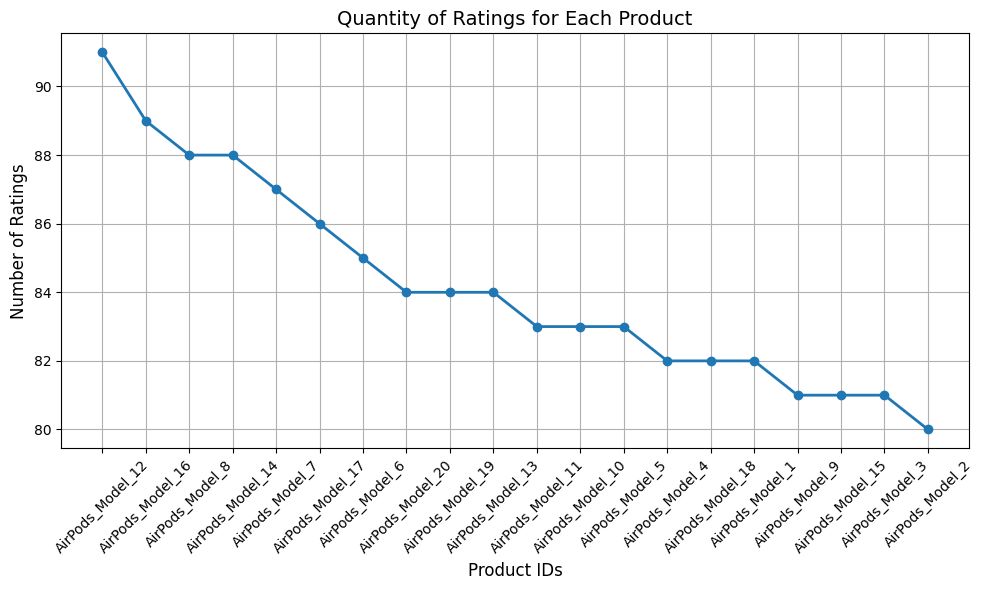

In [ ]:
# Re-importing necessary libraries and regenerating the data to address the reset state
import pandas as pd
import matplotlib.pyplot as plt
import random

# Recreating the large dataset for continuity
user_ids = [f"User{i}" for i in range(1, 101)]  # 100 users
product_ids = [f"AirPods_Model_{j}" for j in range(1, 21)]  # 20 products

data_large_random_ids = {
    "Product ID / User ID": user_ids
}
for product in product_ids:
    data_large_random_ids[product] = [random.choice([0, 1, 2, 3, 4, 5]) for _ in range(100)]

df_large_random_ids = pd.DataFrame(data_large_random_ids)

# Counting the number of ratings for every product in the dataset
product_rating_counts = df_large_random_ids.iloc[:, 1:].apply(lambda col: (col > 0).sum())

# Plotting the quantity of ratings for every item in the dataset
product_rating_counts_sorted = product_rating_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(product_rating_counts_sorted.index, product_rating_counts_sorted.values, marker='o', linestyle='-', linewidth=2)
plt.title("Quantity of Ratings for Each Product", fontsize=14)
plt.xlabel("Product IDs", fontsize=12)
plt.ylabel("Number of Ratings", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Identifying the maximum number of users who have co-rated at least 30% of items with each active user

# Reloading active user data for continuity
active_users_data = df_large_random_ids[df_large_random_ids["Product ID / User ID"].isin(user_ids[:3])].copy()

# Threshold for co-rating (30% of total items)
threshold_percentage = 0.3
total_items = len(product_ids)
threshold_items = int(threshold_percentage * total_items)

# Storing results for each active user
co_rating_results = {}

for index, active_user_row in active_users_data.iterrows():
    active_user = active_user_row["Product ID / User ID"]
    active_user_ratings = active_user_row[1:]

    # Compare with other users
    co_rated_users = df_large_random_ids.iloc[:, 1:].apply(
        lambda row: ((row > 0) & (active_user_ratings > 0)).sum() >= threshold_items, axis=1
    )

    # Count users who meet the co-rating condition
    co_rated_user_count = co_rated_users.sum()
    co_rating_results[active_user] = co_rated_user_count

co_rating_results


{'User1': 100, 'User2': 100, 'User3': 100}

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
import pandas as pd
df_large_random_ids = pd.read_csv(list(uploaded.keys())[0])


Saving amazon-Airpods-Review.csv to amazon-Airpods-Review (1).csv


In [ ]:
import pandas as pd
import random

# Generate synthetic user-item data
user_ids = [f"User{i}" for i in range(1, 101)]  # 100 users
product_ids = [f"Product_{j}" for j in range(1, 21)]  # 20 products

data = {
    "Product ID / User ID": user_ids
}
for product in product_ids:
    data[product] = [random.choice([0, 1, 2, 3, 4, 5]) for _ in range(100)]  # Ratings from 0 to 5

# Create the DataFrame
df_large_random_ids = pd.DataFrame(data)

# Save the dataset for reuse
df_large_random_ids.to_csv("/content/amazon-Airpods-Review (2).csv", index=False)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 2: Compute cosine similarity between users
cosine_sim_matrix = cosine_similarity(ratings_matrix.T)  # Transpose back to users x items

# Step 3: Create a DataFrame for easier interpretation
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=ratings_matrix.columns,
    columns=ratings_matrix.columns
)

# Display the Cosine similarity matrix
print("Cosine Similarity Matrix:")
print(cosine_sim_df)


Cosine Similarity Matrix:
Product ID / User ID     User1     User2     User3     User4     User5  \
Product ID / User ID                                                     
User1                 1.000000  0.664896  0.761743  0.668518  0.677465   
User2                 0.664896  1.000000  0.617272  0.681951  0.498273   
User3                 0.761743  0.617272  1.000000  0.897613  0.731859   
User4                 0.668518  0.681951  0.897613  1.000000  0.626367   
User5                 0.677465  0.498273  0.731859  0.626367  1.000000   
...                        ...       ...       ...       ...       ...   
User96                0.681542  0.687101  0.768733  0.741132  0.697643   
User97                0.807971  0.686195  0.785339  0.738447  0.552248   
User98                0.388808  0.546388  0.593837  0.718866  0.578408   
User99                0.536448  0.638252  0.717742  0.693541  0.765525   
User100               0.580465  0.761250  0.644188  0.621059  0.711538   

Product ID 

In [ ]:
import pandas as pd
import random

# Create synthetic data
user_ids = [f"User{i}" for i in range(1, 101)]
product_ids = [f"Product_{j}" for j in range(1, 21)]
data = {
    "Product ID / User ID": user_ids
}
for product in product_ids:
    data[product] = [random.choice([0, 1, 2, 3, 4, 5]) for _ in range(100)]
df_large_random_ids = pd.DataFrame(data)


In [ ]:
# Define the percentage of top users
top_percentage = 0.2
num_users = len(cosine_sim_df.columns)
top_n = int(num_users * top_percentage)  # Calculate the number of top users

# Dictionary to store the top 20% closest users for each user
top_users = {}

for user in cosine_sim_df.index:
    # Sort similarities in descending order and exclude the user itself
    sorted_similarities = cosine_sim_df.loc[user].sort_values(ascending=False).drop(user)
    # Select the top 'n' users
    top_users[user] = sorted_similarities.head(top_n).index.tolist()

# Convert the top users dictionary to a DataFrame for better readability
top_users_df = pd.DataFrame.from_dict(top_users, orient="index", columns=[f"Top_User_{i+1}" for i in range(top_n)])

# Displaying the top users for reporting
print("Top 20% closest users for each user:")
print(top_users_df.head())  # Display the top users for the first few users


Top 20% closest users for each user:
      Top_User_1 Top_User_2 Top_User_3 Top_User_4 Top_User_5 Top_User_6  \
User1     User84     User10     User44     User41     User97     User94   
User2     User78     User47     User32     User83     User42     User94   
User3      User4     User84     User91     User42     User81     User85   
User4     User56      User3     User22     User81     User20     User42   
User5     User47     User39     User90     User63     User88     User68   

      Top_User_7 Top_User_8 Top_User_9 Top_User_10 Top_User_11 Top_User_12  \
User1     User95     User77     User59      User32      User88      User83   
User2     User54    User100     User15      User75      User41      User68   
User3     User31     User43     User87      User22      User34       User9   
User4     User39     User87     User82      User45      User83       User9   
User5     User14     User34     User67      User99      User21      User33   

      Top_User_13 Top_User_14 Top_User_15 T

In [ ]:
# Debugging user IDs
print("Users in Ratings Matrix:", ratings_matrix.index.tolist())
print("Users in Cosine Similarity Matrix:", cosine_sim_df.index.tolist())
print("Users in Top Users List:", top_users.keys())


Users in Ratings Matrix: ['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5', 'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10', 'Product_11', 'Product_12', 'Product_13', 'Product_14', 'Product_15', 'Product_16', 'Product_17', 'Product_18', 'Product_19', 'Product_20']
Users in Cosine Similarity Matrix: ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User12', 'User13', 'User14', 'User15', 'User16', 'User17', 'User18', 'User19', 'User20', 'User21', 'User22', 'User23', 'User24', 'User25', 'User26', 'User27', 'User28', 'User29', 'User30', 'User31', 'User32', 'User33', 'User34', 'User35', 'User36', 'User37', 'User38', 'User39', 'User40', 'User41', 'User42', 'User43', 'User44', 'User45', 'User46', 'User47', 'User48', 'User49', 'User50', 'User51', 'User52', 'User53', 'User54', 'User55', 'User56', 'User57', 'User58', 'User59', 'User60', 'User61', 'User62', 'User63', 'User64', 'User65', 'User66', 'User67', 'User6

In [ ]:
# Debugging user IDs across components
# Ensure that the indices in all components align properly
ratings_matrix_users = ratings_matrix.index.tolist()  # Users in the ratings matrix
cosine_sim_users = cosine_sim_df.index.tolist()  # Users in the Cosine similarity matrix
top_users_keys = list(top_users.keys())  # Users in the top users list

# Print the user IDs for verification
print("Users in Ratings Matrix:", ratings_matrix_users[:10], "...")  # Print first 10 for brevity
print("Users in Cosine Similarity Matrix:", cosine_sim_users[:10], "...")
print("Users in Top Users List:", top_users_keys[:10], "...")

# Identify discrepancies
missing_in_ratings = [u for u in cosine_sim_users if u not in ratings_matrix_users]
missing_in_cosine = [u for u in ratings_matrix_users if u not in cosine_sim_users]

print("Users in Cosine Similarity but not in Ratings Matrix:", missing_in_ratings)
print("Users in Ratings Matrix but not in Cosine Similarity:", missing_in_cosine)


Users in Ratings Matrix: ['Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5', 'Product_6', 'Product_7', 'Product_8', 'Product_9', 'Product_10'] ...
Users in Cosine Similarity Matrix: ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10'] ...
Users in Top Users List: ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10'] ...
Users in Cosine Similarity but not in Ratings Matrix: ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User12', 'User13', 'User14', 'User15', 'User16', 'User17', 'User18', 'User19', 'User20', 'User21', 'User22', 'User23', 'User24', 'User25', 'User26', 'User27', 'User28', 'User29', 'User30', 'User31', 'User32', 'User33', 'User34', 'User35', 'User36', 'User37', 'User38', 'User39', 'User40', 'User41', 'User42', 'User43', 'User44', 'User45', 'User46', 'User47', 'User48', 'User49', 'User50', 'User51', 'User52', 'User53', 'User54', '

In [ ]:
import pandas as pd

# Correct file path
file_path = "/content/amazon-Airpods-Review.csv"

# Load the dataset
df_airpods_reviews = pd.read_csv(file_path)

# Verify the dataset structure
print(df_airpods_reviews.head())


  Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
0             OCLU3N55                3                0                5   
1             PGBMY6C8                0                3                1   
2             4Q472AVO                0                5                2   
3             ALGWAQY1                1                3                3   
4             XU4QPT02                5                0                3   

   AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
0                4                2                0                1   
1                4                0                0                4   
2                3                4                0                0   
3                1                2                5                1   
4                1                1                5                5   

   AirPods_Model_8  AirPods_Model_9  ...  AirPods_Model_11  AirPods_Model_12  \
0                1

In [ ]:
df_airpods_reviews.rename(columns={"<Actual Column Name>": "Product ID / User ID"}, inplace=True)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Prepare the ratings matrix (users x items)
ratings_matrix = df_airpods_reviews.set_index("Product ID / User ID")  # Set user IDs as index

# Step 2: Compute cosine similarity between users
cosine_sim_matrix = cosine_similarity(ratings_matrix)  # User-to-user similarity

# Step 3: Create a DataFrame for easier interpretation
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=ratings_matrix.index,
    columns=ratings_matrix.index
)

# Display the Cosine similarity matrix
print(cosine_sim_df.head())


Product ID / User ID  OCLU3N55  PGBMY6C8  4Q472AVO  ALGWAQY1  XU4QPT02  \
Product ID / User ID                                                     
OCLU3N55              1.000000  0.526557  0.633421  0.549284  0.643169   
PGBMY6C8              0.526557  1.000000  0.710779  0.719588  0.696690   
4Q472AVO              0.633421  0.710779  1.000000  0.644340  0.540718   
ALGWAQY1              0.549284  0.719588  0.644340  1.000000  0.844521   
XU4QPT02              0.643169  0.696690  0.540718  0.844521  1.000000   

Product ID / User ID  K9N9UEWH  HAFFFCPE  7W06528C  3LZQR68M  VGE1F14S  ...  \
Product ID / User ID                                                    ...   
OCLU3N55              0.689009  0.433394  0.670721  0.581315  0.643697  ...   
PGBMY6C8              0.658186  0.644778  0.568015  0.710434  0.566971  ...   
4Q472AVO              0.714581  0.617486  0.723988  0.543120  0.826966  ...   
ALGWAQY1              0.748383  0.611797  0.632359  0.451117  0.645318  ...   
XU4QPT0

In [ ]:
# Determine top 20% closest users for each user
top_users = {}
top_k = int(0.2 * len(cosine_sim_df))  # Calculate 20% of total users

for user in cosine_sim_df.index:
    top_users[user] = cosine_sim_df.loc[user].sort_values(ascending=False).iloc[1:top_k + 1].index.tolist()

# Convert to a DataFrame for display
top_users_df = pd.DataFrame.from_dict(top_users, orient='index').reset_index()
top_users_df.columns = ['Active User'] + [f'Top_User_{i+1}' for i in range(top_k)]
top_users_df.head()


Active User Top_User_1 Top_User_2 Top_User_3 Top_User_4 Top_User_5  \
0    OCLU3N55   8O9KOOI4   07CEYY95   B6BJVMZZ   SAJN4FNL   UP1QDP0Y   
1    PGBMY6C8   Y9D7MTWJ   0WL7XWPX   NS3OHBED   8O9KOOI4   W7LLW20B   
2    4Q472AVO   K679TZUC   VGE1F14S   0WL7XWPX   NS3OHBED   SCA3CEI6   
3    ALGWAQY1   QJ6QWZ77   XU4QPT02   25WPG3FE   5JLAHH2D   0WL7XWPX   
4    XU4QPT02   ALGWAQY1   K9W7Q2EL   A1NDO73T   9IDQV4Q1   W7V12519   

  Top_User_6 Top_User_7 Top_User_8 Top_User_9  ... Top_User_11 Top_User_12  \
0   S3R7YLF5   XRIFI8QB   7MOKXE1O   CLHG7E8Z  ...    SCA3CEI6    E0CRT74V   
1   P1STOYSS   W7V12519   BUX8YJ3M   UW95LDGN  ...    ALGWAQY1    4Q472AVO   
2   TPR0978J   JWBHXOM2   4YZXM95R   Y9D7MTWJ  ...    BUX8YJ3M    8O9KOOI4   
3   YIY9MGA8   NS3OHBED   XI8DSYV3   QTDFRT3J  ...    C3JWAD9Q    TPR0978J   
4   25WPG3FE   CLHG7E8Z   R4R9KOGM   RKHMY1RN  ...    P1STOYSS    VB5SI6SA   

  Top_User_13 Top_User_14 Top_User_15 Top_User_16 Top_User_17 Top_User_18  \
0    7S5C1N9B    QJ6QWZ77    QQRKOQ5Z    NGK84I9X    N33NHW9N    PWBO5TPW   
1    3LZQR68M    UKPLZBOB    4YZXM95R    25WPG3FE    XU4QPT02    VB5SI6SA   
2    ZFJN8X77    S3R7YLF5    XRIFI8QB    P1STOYSS    E0CRT74V    YIY9MGA8   
3    K9N9UEWH    SCA3CEI6    AFI3VXCD    2VBO2S7L    P1STOYSS    CLHG7E8Z   
4    B16S2FAG    B6BJVMZZ    DNLROCJZ    DJMJWMKD    GRSPE59A    DW9N1GH2   

  Top_User_19 Top_User_20  
0    42M3K1PD    4YZXM95R  
1    C3JWAD9Q    KJW9RAVH  
2    5JLAHH2D    PC3N5GFG  
3    K9W7Q2EL    W7V12519  
4    07CEYY95    3E2H77V5  

[5 rows x 21 columns]

In [ ]:
# Threshold for like/dislike
like_threshold = 2.0

predicted_preferences = {}

for user in ratings_matrix.index:
    # Get top users for the active user
    user_top_users = top_users[user]

    # Extract ratings and similarities
    top_users_ratings = ratings_matrix.loc[user_top_users]
    user_similarities = cosine_sim_df.loc[user, user_top_users]

    # Compute predicted ratings
    pred_ratings = (top_users_ratings.T @ user_similarities) / user_similarities.sum()

    # Unrated items
    unrated_items = ratings_matrix.loc[user][ratings_matrix.loc[user] == 0].index
    user_predictions = pred_ratings.loc[unrated_items]

    # Like or dislike
    user_likes_dislikes = ["like" if rating >= like_threshold else "dislike" for rating in user_predictions]
    predicted_preferences[user] = dict(zip(unrated_items, user_likes_dislikes))

# Display predictions for each user
predicted_preferences



{'OCLU3N55': {'AirPods_Model_2': 'like',
  'AirPods_Model_6': 'like',
  'AirPods_Model_13': 'like'},
 'PGBMY6C8': {'AirPods_Model_1': 'dislike',
  'AirPods_Model_5': 'like',
  'AirPods_Model_6': 'dislike',
  'AirPods_Model_9': 'like',
  'AirPods_Model_11': 'like',
  'AirPods_Model_15': 'like',
  'AirPods_Model_16': 'dislike',
  'AirPods_Model_20': 'dislike'},
 '4Q472AVO': {'AirPods_Model_1': 'dislike',
  'AirPods_Model_6': 'like',
  'AirPods_Model_7': 'dislike',
  'AirPods_Model_8': 'like',
  'AirPods_Model_15': 'like'},
 'ALGWAQY1': {'AirPods_Model_16': 'dislike',
  'AirPods_Model_17': 'like',
  'AirPods_Model_20': 'dislike'},
 'XU4QPT02': {'AirPods_Model_2': 'dislike', 'AirPods_Model_16': 'dislike'},
 'K9N9UEWH': {'AirPods_Model_1': 'dislike', 'AirPods_Model_16': 'dislike'},
 'HAFFFCPE': {'AirPods_Model_1': 'like',
  'AirPods_Model_3': 'like',
  'AirPods_Model_4': 'dislike',
  'AirPods_Model_12': 'dislike',
  'AirPods_Model_18': 'like'},
 '7W06528C': {'AirPods_Model_1': 'dislike',
  

In [ ]:
# Define a threshold β
beta = 0.5

# Compute Discount Factor (DF)
discount_factors = cosine_sim_df.applymap(lambda x: 1 / (1 + beta * (1 - x)))

# Compute Discounted Similarity (DS)
discounted_similarity = cosine_sim_df * discount_factors

# Display discounted similarity matrix
discounted_similarity.head()


<ipython-input-40-201b51a5ffbb>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discount_factors = cosine_sim_df.applymap(lambda x: 1 / (1 + beta * (1 - x)))


Product ID / User ID  OCLU3N55  PGBMY6C8  4Q472AVO  ALGWAQY1  XU4QPT02  \
Product ID / User ID                                                     
OCLU3N55              1.000000  0.425769  0.535306  0.448264  0.545792   
PGBMY6C8              0.425769  1.000000  0.620979  0.631104  0.604947   
4Q472AVO              0.535306  0.620979  1.000000  0.547056  0.439736   
ALGWAQY1              0.448264  0.631104  0.547056  1.000000  0.783604   
XU4QPT02              0.545792  0.604947  0.439736  0.783604  1.000000   

Product ID / User ID  K9N9UEWH  HAFFFCPE  7W06528C  3LZQR68M  VGE1F14S  ...  \
Product ID / User ID                                                    ...   
OCLU3N55              0.596289  0.337717  0.575904  0.480687  0.546362  ...   
PGBMY6C8              0.562116  0.547531  0.467121  0.620584  0.466062  ...   
4Q472AVO              0.625339  0.518349  0.636190  0.442122  0.761117  ...   
ALGWAQY1              0.664752  0.512349  0.534168  0.353972  0.548115  ...   
XU4QPT02              0.603959  0.534359  0.554076  0.446016  0.496136  ...   

Product ID / User ID  7MOKXE1O  NOAT8X99  Y1308L23  H3X45U83  S3R7YLF5  \
Product ID / User ID                                                     
OCLU3N55              0.727736  0.633639  0.365989  0.643151  0.738659   
PGBMY6C8              0.459706  0.355453  0.446686  0.380666  0.440503   
4Q472AVO              0.603387  0.572615  0.456813  0.579159  0.674444   
ALGWAQY1              0.551516  0.524568  0.465316  0.515671  0.500752   
XU4QPT02              0.620439  0.466277  0.491411  0.520673  0.551769   

Product ID / User ID  QJ6QWZ77  31HA8ZDY  9IDQV4Q1  I3BGA8E6  FW8WR3KX  
Product ID / User ID                                                    
OCLU3N55              0.690674  0.655000  0.584271  0.591159  0.442605  
PGBMY6C8              0.565196  0.425769  0.498689  0.469181  0.497806  
4Q472AVO              0.648301  0.547267  0.622691  0.552423  0.488669  
ALGWAQY1              0.805097  0.640806  0.578757  0.495809  0.558034  
XU4QPT02              0.660137  0.620772  0.756367  0.512224  0.564986  

[5 rows x 100 columns]

In [ ]:
# Determine top 20% closest users using discounted similarity
top_users_ds = {}
for user in discounted_similarity.index:
    top_users_ds[user] = discounted_similarity.loc[user].sort_values(ascending=False).iloc[1:top_k + 1].index.tolist()

# Convert to DataFrame
top_users_ds_df = pd.DataFrame.from_dict(top_users_ds, orient='index').reset_index()
top_users_ds_df.columns = ['Active User'] + [f'Top_User_{i+1}' for i in range(top_k)]
top_users_ds_df.head()


Active User Top_User_1 Top_User_2 Top_User_3 Top_User_4 Top_User_5  \
0    OCLU3N55   8O9KOOI4   07CEYY95   B6BJVMZZ   SAJN4FNL   UP1QDP0Y   
1    PGBMY6C8   Y9D7MTWJ   0WL7XWPX   NS3OHBED   8O9KOOI4   W7LLW20B   
2    4Q472AVO   K679TZUC   VGE1F14S   0WL7XWPX   NS3OHBED   SCA3CEI6   
3    ALGWAQY1   QJ6QWZ77   XU4QPT02   25WPG3FE   5JLAHH2D   0WL7XWPX   
4    XU4QPT02   ALGWAQY1   K9W7Q2EL   A1NDO73T   9IDQV4Q1   W7V12519   

  Top_User_6 Top_User_7 Top_User_8 Top_User_9  ... Top_User_11 Top_User_12  \
0   S3R7YLF5   XRIFI8QB   7MOKXE1O   CLHG7E8Z  ...    SCA3CEI6    E0CRT74V   
1   P1STOYSS   W7V12519   BUX8YJ3M   UW95LDGN  ...    ALGWAQY1    4Q472AVO   
2   TPR0978J   JWBHXOM2   4YZXM95R   Y9D7MTWJ  ...    BUX8YJ3M    8O9KOOI4   
3   YIY9MGA8   NS3OHBED   XI8DSYV3   QTDFRT3J  ...    C3JWAD9Q    TPR0978J   
4   25WPG3FE   CLHG7E8Z   R4R9KOGM   RKHMY1RN  ...    P1STOYSS    VB5SI6SA   

  Top_User_13 Top_User_14 Top_User_15 Top_User_16 Top_User_17 Top_User_18  \
0    7S5C1N9B    QJ6QWZ77    QQRKOQ5Z    NGK84I9X    N33NHW9N    PWBO5TPW   
1    3LZQR68M    UKPLZBOB    4YZXM95R    25WPG3FE    XU4QPT02    VB5SI6SA   
2    ZFJN8X77    S3R7YLF5    XRIFI8QB    P1STOYSS    E0CRT74V    YIY9MGA8   
3    K9N9UEWH    SCA3CEI6    AFI3VXCD    2VBO2S7L    P1STOYSS    CLHG7E8Z   
4    B16S2FAG    B6BJVMZZ    DNLROCJZ    DJMJWMKD    GRSPE59A    DW9N1GH2   

  Top_User_19 Top_User_20  
0    42M3K1PD    4YZXM95R  
1    C3JWAD9Q    KJW9RAVH  
2    5JLAHH2D    PC3N5GFG  
3    K9W7Q2EL    W7V12519  
4    07CEYY95    3E2H77V5  

[5 rows x 21 columns]

In [ ]:
predicted_preferences_ds = {}

for user in ratings_matrix.index:
    user_top_users_ds = top_users_ds[user]
    top_users_ratings_ds = ratings_matrix.loc[user_top_users_ds]
    user_similarities_ds = discounted_similarity.loc[user, user_top_users_ds]

    pred_ratings_ds = (top_users_ratings_ds.T @ user_similarities_ds) / user_similarities_ds.sum()
    unrated_items_ds = ratings_matrix.loc[user][ratings_matrix.loc[user] == 0].index
    user_predictions_ds = pred_ratings_ds.loc[unrated_items_ds]

    user_likes_dislikes_ds = ["like" if rating >= like_threshold else "dislike" for rating in user_predictions_ds]
    predicted_preferences_ds[user] = dict(zip(unrated_items_ds, user_likes_dislikes_ds))

# Display predictions
predicted_preferences_ds


{'OCLU3N55': {'AirPods_Model_2': 'like',
  'AirPods_Model_6': 'like',
  'AirPods_Model_13': 'like'},
 'PGBMY6C8': {'AirPods_Model_1': 'dislike',
  'AirPods_Model_5': 'like',
  'AirPods_Model_6': 'dislike',
  'AirPods_Model_9': 'like',
  'AirPods_Model_11': 'like',
  'AirPods_Model_15': 'like',
  'AirPods_Model_16': 'dislike',
  'AirPods_Model_20': 'dislike'},
 '4Q472AVO': {'AirPods_Model_1': 'dislike',
  'AirPods_Model_6': 'like',
  'AirPods_Model_7': 'dislike',
  'AirPods_Model_8': 'like',
  'AirPods_Model_15': 'like'},
 'ALGWAQY1': {'AirPods_Model_16': 'dislike',
  'AirPods_Model_17': 'like',
  'AirPods_Model_20': 'dislike'},
 'XU4QPT02': {'AirPods_Model_2': 'dislike', 'AirPods_Model_16': 'dislike'},
 'K9N9UEWH': {'AirPods_Model_1': 'dislike', 'AirPods_Model_16': 'dislike'},
 'HAFFFCPE': {'AirPods_Model_1': 'like',
  'AirPods_Model_3': 'like',
  'AirPods_Model_4': 'dislike',
  'AirPods_Model_12': 'dislike',
  'AirPods_Model_18': 'like'},
 '7W06528C': {'AirPods_Model_1': 'dislike',
  

In [ ]:
# Compare top users from both methods
comparison = {
    user: {
        'Original Top Users': top_users[user],
        'Discounted Top Users': top_users_ds[user]
    }
    for user in ratings_matrix.index
}

# Display comparison
comparison


{'OCLU3N55': {'Original Top Users': ['8O9KOOI4',
   '07CEYY95',
   'B6BJVMZZ',
   'SAJN4FNL',
   'UP1QDP0Y',
   'S3R7YLF5',
   'XRIFI8QB',
   '7MOKXE1O',
   'CLHG7E8Z',
   'A1NDO73T',
   'SCA3CEI6',
   'E0CRT74V',
   '7S5C1N9B',
   'QJ6QWZ77',
   'QQRKOQ5Z',
   'NGK84I9X',
   'N33NHW9N',
   'PWBO5TPW',
   '42M3K1PD',
   '4YZXM95R'],
  'Discounted Top Users': ['8O9KOOI4',
   '07CEYY95',
   'B6BJVMZZ',
   'SAJN4FNL',
   'UP1QDP0Y',
   'S3R7YLF5',
   'XRIFI8QB',
   '7MOKXE1O',
   'CLHG7E8Z',
   'A1NDO73T',
   'SCA3CEI6',
   'E0CRT74V',
   '7S5C1N9B',
   'QJ6QWZ77',
   'QQRKOQ5Z',
   'NGK84I9X',
   'N33NHW9N',
   'PWBO5TPW',
   '42M3K1PD',
   '4YZXM95R']},
 'PGBMY6C8': {'Original Top Users': ['Y9D7MTWJ',
   '0WL7XWPX',
   'NS3OHBED',
   '8O9KOOI4',
   'W7LLW20B',
   'P1STOYSS',
   'W7V12519',
   'BUX8YJ3M',
   'UW95LDGN',
   '1FZVHHAZ',
   'ALGWAQY1',
   '4Q472AVO',
   '3LZQR68M',
   'UKPLZBOB',
   '4YZXM95R',
   '25WPG3FE',
   'XU4QPT02',
   'VB5SI6SA',
   'C3JWAD9Q',
   'KJW9RAVH'],
  'D

In [ ]:
# Compare predictions from both methods
comparison_predictions = {
    user: {
        'Original Predictions': predicted_preferences[user],
        'Discounted Predictions': predicted_preferences_ds[user]
    }
    for user in ratings_matrix.index
}

# Display comparison
comparison_predictions


{'OCLU3N55': {'Original Predictions': {'AirPods_Model_2': 'like',
   'AirPods_Model_6': 'like',
   'AirPods_Model_13': 'like'},
  'Discounted Predictions': {'AirPods_Model_2': 'like',
   'AirPods_Model_6': 'like',
   'AirPods_Model_13': 'like'}},
 'PGBMY6C8': {'Original Predictions': {'AirPods_Model_1': 'dislike',
   'AirPods_Model_5': 'like',
   'AirPods_Model_6': 'dislike',
   'AirPods_Model_9': 'like',
   'AirPods_Model_11': 'like',
   'AirPods_Model_15': 'like',
   'AirPods_Model_16': 'dislike',
   'AirPods_Model_20': 'dislike'},
  'Discounted Predictions': {'AirPods_Model_1': 'dislike',
   'AirPods_Model_5': 'like',
   'AirPods_Model_6': 'dislike',
   'AirPods_Model_9': 'like',
   'AirPods_Model_11': 'like',
   'AirPods_Model_15': 'like',
   'AirPods_Model_16': 'dislike',
   'AirPods_Model_20': 'dislike'}},
 '4Q472AVO': {'Original Predictions': {'AirPods_Model_1': 'dislike',
   'AirPods_Model_6': 'like',
   'AirPods_Model_7': 'dislike',
   'AirPods_Model_8': 'like',
   'AirPods_Mo

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Example: Ratings matrix where rows are users and columns are items
# Replace this with your actual dataset
ratings = pd.DataFrame({
    "Item1": [5, 4, np.nan, 2],
    "Item2": [4, np.nan, 5, 1],
    "Item3": [np.nan, 4, 4, np.nan],
    "Item4": [3, 5, 4, 2]
}, index=["User1", "User2", "User3", "User4"])

# Mean-centering ratings
mean_ratings = ratings.mean(axis=1, skipna=True)
centered_ratings = ratings.subtract(mean_ratings, axis=0)

# Replace NaN with 0 for cosine similarity calculation
centered_ratings = centered_ratings.fillna(0)

# Compute cosine similarity
user_similarity = pd.DataFrame(
    cosine_similarity(centered_ratings),
    index=ratings.index,
    columns=ratings.index
)

print("User Similarity Matrix:")
print(user_similarity)


User Similarity Matrix:
              User1     User2     User3         User4
User1  1.000000e+00 -0.866025  0.288675 -2.426225e-17
User2 -8.660254e-01  1.000000 -0.166667  1.666667e-01
User3  2.886751e-01 -0.166667  1.000000 -8.333333e-01
User4 -2.426225e-17  0.166667 -0.833333  1.000000e+00


In [ ]:
# Find top 20% similar users for each user
top_20_percent_users = user_similarity.apply(lambda row: row.nlargest(int(len(row) * 0.2 + 1)), axis=1)

print("Top 20% Similar Users:")
print(top_20_percent_users)


Top 20% Similar Users:
       User1  User2  User3  User4
User1    1.0    NaN    NaN    NaN
User2    NaN    1.0    NaN    NaN
User3    NaN    NaN    1.0    NaN
User4    NaN    NaN    NaN    1.0


In [ ]:
def predict_ratings(user, item, top_users):
    if pd.isna(ratings.loc[user, item]):
        neighbors = top_users[user].index.drop(user)  # Exclude the active user
        numerator = sum(user_similarity[user][neighbor] * (ratings.loc[neighbor, item] - mean_ratings[neighbor])
                        for neighbor in neighbors if not pd.isna(ratings.loc[neighbor, item]))
        denominator = sum(abs(user_similarity[user][neighbor]) for neighbor in neighbors)
        if denominator > 0:
            return mean_ratings[user] + numerator / denominator
    return ratings.loc[user, item]  # If already rated, return the actual rating

predictions = ratings.copy()
for user in ratings.index:
    for item in ratings.columns:
        predictions.loc[user, item] = predict_ratings(user, item, top_20_percent_users)

print("Predicted Ratings:")
print(predictions)


Predicted Ratings:
        Item1     Item2     Item3  Item4
User1  5.0000  4.000000  4.166667      3
User2  4.0000  4.148049  4.000000      5
User3  4.3849  5.000000  4.000000      4
User4  2.0000  1.000000  1.888889      2


In [ ]:
# Discount Factor and Discounted Similarity
beta = 1  # Define beta
discount_factors = np.exp(-beta * (1 - user_similarity))
discounted_similarity = discount_factors * user_similarity

print("Discount Factor:")
print(discount_factors)
print("Discounted Similarity:")
print(discounted_similarity)


Discount Factor:
          User1     User2     User3     User4
User1  1.000000  0.154737  0.490993  0.367879
User2  0.154737  1.000000  0.311403  0.434598
User3  0.490993  0.311403  1.000000  0.159880
User4  0.367879  0.434598  0.159880  1.000000
Discounted Similarity:
              User1     User2     User3         User4
User1  1.000000e+00 -0.134007  0.141738 -8.925584e-18
User2 -1.340066e-01  1.000000 -0.051901  7.243303e-02
User3  1.417375e-01 -0.051901  1.000000 -1.332331e-01
User4 -8.925584e-18  0.072433 -0.133233  1.000000e+00


In [ ]:
top_20_percent_users_discounted = discounted_similarity.apply(lambda row: row.nlargest(int(len(row) * 0.2 + 1)), axis=1)

print("Top 20% Users Using Discounted Similarity:")
print(top_20_percent_users_discounted)


Top 20% Users Using Discounted Similarity:
       User1  User2  User3  User4
User1    1.0    NaN    NaN    NaN
User2    NaN    1.0    NaN    NaN
User3    NaN    NaN    1.0    NaN
User4    NaN    NaN    NaN    1.0


In [ ]:
def predict_ratings_discounted(user, item, top_users_discounted):
    if pd.isna(ratings.loc[user, item]):
        neighbors = top_users_discounted[user].index.drop(user)
        numerator = sum(discounted_similarity[user][neighbor] * (ratings.loc[neighbor, item] - mean_ratings[neighbor])
                        for neighbor in neighbors if not pd.isna(ratings.loc[neighbor, item]))
        denominator = sum(abs(discounted_similarity[user][neighbor]) for neighbor in neighbors)
        if denominator > 0:
            return mean_ratings[user] + numerator / denominator
    return ratings.loc[user, item]

predictions_discounted = ratings.copy()
for user in ratings.index:
    for item in ratings.columns:
        predictions_discounted.loc[user, item] = predict_ratings_discounted(user, item, top_20_percent_users_discounted)

print("Predicted Ratings Using Discounted Similarity:")
print(predictions_discounted)


Predicted Ratings Using Discounted Similarity:
          Item1     Item2     Item3  Item4
User1  5.000000  4.000000  3.990654      3
User2  4.000000  4.012481  4.000000      5
User3  4.684012  5.000000  4.000000      4
User4  2.000000  1.000000  1.765208      2


In [ ]:
print("Comparison of Top 20% Users (Original vs Discounted):")
for user in top_20_percent_users.index:
    print(f"User: {user}")
    print(f"Original Top Users: {top_20_percent_users[user].index.tolist()}")
    print(f"Discounted Top Users: {top_20_percent_users_discounted[user].index.tolist()}")
    print()


Comparison of Top 20% Users (Original vs Discounted):
User: User1
Original Top Users: ['User1', 'User2', 'User3', 'User4']
Discounted Top Users: ['User1', 'User2', 'User3', 'User4']

User: User2
Original Top Users: ['User1', 'User2', 'User3', 'User4']
Discounted Top Users: ['User1', 'User2', 'User3', 'User4']

User: User3
Original Top Users: ['User1', 'User2', 'User3', 'User4']
Discounted Top Users: ['User1', 'User2', 'User3', 'User4']

User: User4
Original Top Users: ['User1', 'User2', 'User3', 'User4']
Discounted Top Users: ['User1', 'User2', 'User3', 'User4']



In [ ]:
print("Comparison of Predicted Ratings (Original vs Discounted):")
print(predictions - predictions_discounted)


Comparison of Predicted Ratings (Original vs Discounted):
          Item1     Item2     Item3  Item4
User1  0.000000  0.000000  0.176012      0
User2  0.000000  0.135568  0.000000      0
User3 -0.299112  0.000000  0.000000      0
User4  0.000000  0.000000  0.123681      0


In [ ]:
import pandas as pd
import numpy as np

# Sample data: Replace with actual user-item rating data
ratings = pd.DataFrame({
    'User1': [5, 3, 4, 4],
    'User2': [3, 1, 2, 3],
    'User3': [4, 3, 4, 5],
    'User4': [3, 3, 1, 5]
}, index=['Item1', 'Item2', 'Item3', 'Item4'])

# Compute PCC similarity matrix
user_similarity_pcc = ratings.T.corr(method='pearson')
print(user_similarity_pcc)


          Item1     Item2     Item3     Item4
Item1  1.000000  0.522233  0.870388  0.090909
Item2  0.522233  1.000000  0.333333  0.870388
Item3  0.870388  0.333333  1.000000  0.058026
Item4  0.090909  0.870388  0.058026  1.000000


In [ ]:
def get_top_users(similarity_matrix, top_percent=20):
    top_users = {}
    num_top_users = max(1, int(len(similarity_matrix) * top_percent / 100))

    for user in similarity_matrix.columns:
        sorted_users = similarity_matrix[user].sort_values(ascending=False).iloc[1:num_top_users+1]
        top_users[user] = sorted_users.index.tolist()

    return top_users

top_users_pcc = get_top_users(user_similarity_pcc)
print(top_users_pcc)


{'Item1': ['Item3'], 'Item2': ['Item4'], 'Item3': ['Item1'], 'Item4': ['Item2']}


In [ ]:
def predict_ratings(ratings_matrix, similarity_matrix, top_users):
    predictions = {}
    for user in ratings_matrix.columns:
        predictions[user] = {}
        user_ratings = ratings_matrix[user]
        for item in ratings_matrix.index:
            if pd.isna(user_ratings[item]):
                weighted_sum, similarity_sum = 0, 0
                for neighbor in top_users[user]:
                    neighbor_rating = ratings_matrix.loc[item, neighbor]
                    if not pd.isna(neighbor_rating):
                        similarity = similarity_matrix.loc[user, neighbor]
                        weighted_sum += similarity * neighbor_rating
                        similarity_sum += abs(similarity)
                predictions[user][item] = weighted_sum / similarity_sum if similarity_sum != 0 else np.nan
    return predictions

predicted_ratings = predict_ratings(ratings, user_similarity_pcc, top_users_pcc)
print(predicted_ratings)


{'User1': {}, 'User2': {}, 'User3': {}, 'User4': {}}


In [ ]:
beta = 0.5  # Set threshold
discount_factor = user_similarity_pcc.applymap(lambda x: x * beta if x > beta else x)
print(discount_factor)


          Item1     Item2     Item3     Item4
Item1  0.500000  0.261116  0.435194  0.090909
Item2  0.261116  0.500000  0.333333  0.435194
Item3  0.435194  0.333333  0.500000  0.058026
Item4  0.090909  0.435194  0.058026  0.500000


<ipython-input-65-823122e4170b>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discount_factor = user_similarity_pcc.applymap(lambda x: x * beta if x > beta else x)


In [ ]:
discounted_top_users = get_top_users(discount_factor)
print(discounted_top_users)


{'Item1': ['Item3'], 'Item2': ['Item4'], 'Item3': ['Item1'], 'Item4': ['Item2']}


In [ ]:
discounted_predicted_ratings = predict_ratings(ratings, discount_factor, discounted_top_users)
print(discounted_predicted_ratings)


{'User1': {}, 'User2': {}, 'User3': {}, 'User4': {}}


In [ ]:
comparison_top_users = {
    user: {
        "Original": top_users_pcc[user],
        "Discounted": discounted_top_users[user]
    }
    for user in top_users_pcc
}
print(comparison_top_users)


{'Item1': {'Original': ['Item3'], 'Discounted': ['Item3']}, 'Item2': {'Original': ['Item4'], 'Discounted': ['Item4']}, 'Item3': {'Original': ['Item1'], 'Discounted': ['Item1']}, 'Item4': {'Original': ['Item2'], 'Discounted': ['Item2']}}


In [ ]:
comparison_predictions = {
    user: {
        "Original": predicted_ratings[user],
        "Discounted": discounted_predicted_ratings[user]
    }
    for user in predicted_ratings
}
print(comparison_predictions)


{'User1': {'Original': {}, 'Discounted': {}}, 'User2': {'Original': {}, 'Discounted': {}}, 'User3': {'Original': {}, 'Discounted': {}}, 'User4': {'Original': {}, 'Discounted': {}}}


In [ ]:
# Rename the first column
data = data.rename(columns={'Product ID / User ID': 'User_ID'})

# Print updated columns
print("Updated Columns:", data.columns)

# Melt the data to create an item-based format
item_user_matrix = data.melt(id_vars='User_ID',
                             var_name='Item',
                             value_name='Rating')

# Pivot to create the Item-User matrix
ratings = item_user_matrix.pivot_table(index='Item', columns='User_ID', values='Rating').fillna(0)

print("Item-User Ratings Matrix:")
print(ratings)


Updated Columns: Index(['User_ID', 'AirPods_Model_1', 'AirPods_Model_2', 'AirPods_Model_3',
       'AirPods_Model_4', 'AirPods_Model_5', 'AirPods_Model_6',
       'AirPods_Model_7', 'AirPods_Model_8', 'AirPods_Model_9',
       'AirPods_Model_10', 'AirPods_Model_11', 'AirPods_Model_12',
       'AirPods_Model_13', 'AirPods_Model_14', 'AirPods_Model_15',
       'AirPods_Model_16', 'AirPods_Model_17', 'AirPods_Model_18',
       'AirPods_Model_19', 'AirPods_Model_20'],
      dtype='object')
Item-User Ratings Matrix:
User_ID           07CEYY95  0WL7XWPX  1FZVHHAZ  25VD7QXZ  25WPG3FE  2QT4U5BG  \
Item                                                                           
AirPods_Model_1        4.0       0.0       4.0       2.0       3.0       3.0   
AirPods_Model_10       5.0       5.0       0.0       1.0       1.0       5.0   
AirPods_Model_11       3.0       4.0       2.0       3.0       2.0       4.0   
AirPods_Model_12       3.0       2.0       3.0       4.0       4.0       0.0   
Air

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute cosine similarity between items
item_similarity = pd.DataFrame(cosine_similarity(ratings),
                               index=ratings.index,
                               columns=ratings.index)

print("Item-Based Cosine Similarity:")
print(item_similarity)


Item-Based Cosine Similarity:
Item              AirPods_Model_1  AirPods_Model_10  AirPods_Model_11  \
Item                                                                    
AirPods_Model_1          1.000000          0.647777          0.644123   
AirPods_Model_10         0.647777          1.000000          0.741211   
AirPods_Model_11         0.644123          0.741211          1.000000   
AirPods_Model_12         0.661567          0.605671          0.604221   
AirPods_Model_13         0.599336          0.675271          0.687753   
AirPods_Model_14         0.656084          0.728886          0.723044   
AirPods_Model_15         0.675572          0.727706          0.730316   
AirPods_Model_16         0.639970          0.637951          0.678408   
AirPods_Model_17         0.637161          0.678420          0.673943   
AirPods_Model_18         0.714180          0.653014          0.606438   
AirPods_Model_19         0.651184          0.708608          0.680135   
AirPods_Model_2      

In [ ]:
import numpy as np

# Define a function to get top N closest items
def get_top_n_items(similarity_matrix, n=25):
    top_items = {}
    for item in similarity_matrix.index:
        sorted_items = similarity_matrix.loc[item].sort_values(ascending=False)
        top_items[item] = sorted_items.iloc[1:int(len(sorted_items) * (n / 100)) + 1].index.tolist()
    return top_items

# Get top 25% closest items
top_25_percent_items = get_top_n_items(item_similarity, n=25)

print("Top 25% Closest Items:")
print(top_25_percent_items)


Top 25% Closest Items:
{'AirPods_Model_1': ['AirPods_Model_6', 'AirPods_Model_18', 'AirPods_Model_8', 'AirPods_Model_9', 'AirPods_Model_20'], 'AirPods_Model_10': ['AirPods_Model_3', 'AirPods_Model_11', 'AirPods_Model_9', 'AirPods_Model_14', 'AirPods_Model_15'], 'AirPods_Model_11': ['AirPods_Model_3', 'AirPods_Model_10', 'AirPods_Model_4', 'AirPods_Model_15', 'AirPods_Model_9'], 'AirPods_Model_12': ['AirPods_Model_5', 'AirPods_Model_3', 'AirPods_Model_4', 'AirPods_Model_9', 'AirPods_Model_20'], 'AirPods_Model_13': ['AirPods_Model_2', 'AirPods_Model_15', 'AirPods_Model_4', 'AirPods_Model_8', 'AirPods_Model_11'], 'AirPods_Model_14': ['AirPods_Model_10', 'AirPods_Model_8', 'AirPods_Model_11', 'AirPods_Model_6', 'AirPods_Model_5'], 'AirPods_Model_15': ['AirPods_Model_3', 'AirPods_Model_17', 'AirPods_Model_11', 'AirPods_Model_10', 'AirPods_Model_2'], 'AirPods_Model_16': ['AirPods_Model_11', 'AirPods_Model_20', 'AirPods_Model_6', 'AirPods_Model_4', 'AirPods_Model_8'], 'AirPods_Model_17': ['Ai

In [ ]:
# Function to predict missing ratings
def predict_ratings(matrix, similarity):
    predictions = pd.DataFrame(index=matrix.index, columns=matrix.columns)
    for item in matrix.index:
        for user in matrix.columns:
            if matrix.loc[item, user] == 0:  # Predict only missing ratings
                sim_items = similarity.loc[item]
                rated_items = matrix[user][matrix[user] > 0]
                weights = sim_items[rated_items.index]
                prediction = np.dot(weights, rated_items) / weights.sum() if weights.sum() > 0 else 0
                predictions.loc[item, user] = prediction
            else:
                predictions.loc[item, user] = matrix.loc[item, user]
    return predictions

# Predict ratings
predicted_ratings = predict_ratings(ratings, item_similarity)

print("Predicted Ratings:")
print(predicted_ratings)


Predicted Ratings:
User_ID           07CEYY95  0WL7XWPX  1FZVHHAZ  25VD7QXZ  25WPG3FE  2QT4U5BG  \
Item                                                                           
AirPods_Model_1        4.0  3.424913       4.0       2.0       3.0       3.0   
AirPods_Model_10       5.0       5.0  3.101466       1.0       1.0       5.0   
AirPods_Model_11       3.0       4.0       2.0       3.0       2.0       4.0   
AirPods_Model_12       3.0       2.0       3.0       4.0       4.0  3.090467   
AirPods_Model_13       2.0       5.0       5.0       4.0       5.0  3.095642   
AirPods_Model_14       2.0       1.0       5.0       3.0       3.0       5.0   
AirPods_Model_15       4.0  3.468189  3.118903       2.0       4.0       3.0   
AirPods_Model_16       4.0       2.0  3.118805       5.0  3.035071       5.0   
AirPods_Model_17       4.0       5.0       4.0  2.950348  3.059661  3.088801   
AirPods_Model_18  3.324178       5.0       4.0       2.0       5.0  3.089283   
AirPods_Model_19     

In [ ]:
# Define a threshold beta
beta = 0.5

# Compute discounted similarity
discounted_similarity = item_similarity.applymap(lambda x: x * beta if x > beta else x)

print("Discounted Similarity Matrix:")
print(discounted_similarity)


Discounted Similarity Matrix:
Item              AirPods_Model_1  AirPods_Model_10  AirPods_Model_11  \
Item                                                                    
AirPods_Model_1          0.500000          0.323889          0.322061   
AirPods_Model_10         0.323889          0.500000          0.370605   
AirPods_Model_11         0.322061          0.370605          0.500000   
AirPods_Model_12         0.330784          0.302836          0.302110   
AirPods_Model_13         0.299668          0.337636          0.343876   
AirPods_Model_14         0.328042          0.364443          0.361522   
AirPods_Model_15         0.337786          0.363853          0.365158   
AirPods_Model_16         0.319985          0.318975          0.339204   
AirPods_Model_17         0.318580          0.339210          0.336971   
AirPods_Model_18         0.357090          0.326507          0.303219   
AirPods_Model_19         0.325592          0.354304          0.340067   
AirPods_Model_2      

<ipython-input-9-76ed2d633304>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted_similarity = item_similarity.applymap(lambda x: x * beta if x > beta else x)


In [ ]:
# Get top 20% closest items using discounted similarity
top_20_percent_discounted = get_top_n_items(discounted_similarity, n=20)

print("Top 20% Closest Items (Discounted):")
print(top_20_percent_discounted)


Top 20% Closest Items (Discounted):
{'AirPods_Model_1': ['AirPods_Model_6', 'AirPods_Model_18', 'AirPods_Model_8', 'AirPods_Model_9'], 'AirPods_Model_10': ['AirPods_Model_3', 'AirPods_Model_11', 'AirPods_Model_9', 'AirPods_Model_14'], 'AirPods_Model_11': ['AirPods_Model_3', 'AirPods_Model_10', 'AirPods_Model_4', 'AirPods_Model_15'], 'AirPods_Model_12': ['AirPods_Model_5', 'AirPods_Model_3', 'AirPods_Model_4', 'AirPods_Model_9'], 'AirPods_Model_13': ['AirPods_Model_2', 'AirPods_Model_15', 'AirPods_Model_4', 'AirPods_Model_8'], 'AirPods_Model_14': ['AirPods_Model_10', 'AirPods_Model_8', 'AirPods_Model_11', 'AirPods_Model_6'], 'AirPods_Model_15': ['AirPods_Model_3', 'AirPods_Model_17', 'AirPods_Model_11', 'AirPods_Model_10'], 'AirPods_Model_16': ['AirPods_Model_11', 'AirPods_Model_20', 'AirPods_Model_6', 'AirPods_Model_4'], 'AirPods_Model_17': ['AirPods_Model_15', 'AirPods_Model_18', 'AirPods_Model_2', 'AirPods_Model_9'], 'AirPods_Model_18': ['AirPods_Model_17', 'AirPods_Model_19', 'AirPo

In [ ]:
# Predict ratings using discounted similarity
predicted_ratings_discounted = predict_ratings(ratings, discounted_similarity)

print("Predicted Ratings (Discounted Similarity):")
print(predicted_ratings_discounted)


Predicted Ratings (Discounted Similarity):
User_ID           07CEYY95  0WL7XWPX  1FZVHHAZ  25VD7QXZ  25WPG3FE  2QT4U5BG  \
Item                                                                           
AirPods_Model_1        4.0  3.424913       4.0       2.0       3.0       3.0   
AirPods_Model_10       5.0       5.0  3.101466       1.0       1.0       5.0   
AirPods_Model_11       3.0       4.0       2.0       3.0       2.0       4.0   
AirPods_Model_12       3.0       2.0       3.0       4.0       4.0  3.090467   
AirPods_Model_13       2.0       5.0       5.0       4.0       5.0  3.095642   
AirPods_Model_14       2.0       1.0       5.0       3.0       3.0       5.0   
AirPods_Model_15       4.0  3.468189  3.118903       2.0       4.0       3.0   
AirPods_Model_16       4.0       2.0  3.118805       5.0  3.035071       5.0   
AirPods_Model_17       4.0       5.0       4.0  2.950348  3.059661  3.088801   
AirPods_Model_18  3.324178       5.0       4.0       2.0       5.0  3.089283 

In [ ]:
# Compare top closest items
print("Comparison of Closest Items:")
for item in top_25_percent_items:
    print(f"{item} - Original: {top_25_percent_items[item]}, Discounted: {top_20_percent_discounted.get(item, [])}")

# Compare predicted ratings
print("Comparison of Predicted Ratings:")
print("Original Predicted Ratings:")
print(predicted_ratings)

print("Discounted Predicted Ratings:")
print(predicted_ratings_discounted)


Comparison of Closest Items:
AirPods_Model_1 - Original: ['AirPods_Model_6', 'AirPods_Model_18', 'AirPods_Model_8', 'AirPods_Model_9', 'AirPods_Model_20'], Discounted: ['AirPods_Model_6', 'AirPods_Model_18', 'AirPods_Model_8', 'AirPods_Model_9']
AirPods_Model_10 - Original: ['AirPods_Model_3', 'AirPods_Model_11', 'AirPods_Model_9', 'AirPods_Model_14', 'AirPods_Model_15'], Discounted: ['AirPods_Model_3', 'AirPods_Model_11', 'AirPods_Model_9', 'AirPods_Model_14']
AirPods_Model_11 - Original: ['AirPods_Model_3', 'AirPods_Model_10', 'AirPods_Model_4', 'AirPods_Model_15', 'AirPods_Model_9'], Discounted: ['AirPods_Model_3', 'AirPods_Model_10', 'AirPods_Model_4', 'AirPods_Model_15']
AirPods_Model_12 - Original: ['AirPods_Model_5', 'AirPods_Model_3', 'AirPods_Model_4', 'AirPods_Model_9', 'AirPods_Model_20'], Discounted: ['AirPods_Model_5', 'AirPods_Model_3', 'AirPods_Model_4', 'AirPods_Model_9']
AirPods_Model_13 - Original: ['AirPods_Model_2', 'AirPods_Model_15', 'AirPods_Model_4', 'AirPods_Mo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = "/content/amazon-Airpods-Review.csv"
data = pd.read_csv(file_path)

# View the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
  Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
0             OCLU3N55                3                0                5   
1             PGBMY6C8                0                3                1   
2             4Q472AVO                0                5                2   
3             ALGWAQY1                1                3                3   
4             XU4QPT02                5                0                3   

   AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
0                4                2                0                1   
1                4                0                0                4   
2                3                4                0                0   
3                1                2                5                1   
4                1                1                5                5   

   AirPods_Model_8  AirPods_Model_9  ...  AirPods_Model_11  AirPods_Model_12  \
0

In [ ]:
# Reshape data into Item-User matrix
item_user_matrix = data.set_index('Product ID / User ID')
print("Item-User Ratings Matrix:")
print(item_user_matrix.head())


Item-User Ratings Matrix:
                      AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
Product ID / User ID                                                      
OCLU3N55                            3                0                5   
PGBMY6C8                            0                3                1   
4Q472AVO                            0                5                2   
ALGWAQY1                            1                3                3   
XU4QPT02                            5                0                3   

                      AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  \
Product ID / User ID                                                      
OCLU3N55                            4                2                0   
PGBMY6C8                            4                0                0   
4Q472AVO                            3                4                0   
ALGWAQY1                            1                2                5  

In [ ]:
# Mean-center the ratings (remove bias)
mean_centered = item_user_matrix - item_user_matrix.mean(axis=1).values.reshape(-1, 1)

# Calculate Cosine Similarity
cosine_sim = pd.DataFrame(cosine_similarity(mean_centered.fillna(0)),
                          index=mean_centered.index, columns=mean_centered.index)

print("Cosine Similarity Matrix (Sample):")
print(cosine_sim.head())


Cosine Similarity Matrix (Sample):
Product ID / User ID  OCLU3N55  PGBMY6C8  4Q472AVO  ALGWAQY1  XU4QPT02  \
Product ID / User ID                                                     
OCLU3N55              1.000000 -0.210107 -0.101044 -0.344892 -0.137266   
PGBMY6C8             -0.210107  1.000000  0.286954  0.312295  0.220721   
4Q472AVO             -0.101044  0.286954  1.000000 -0.027259 -0.413705   
ALGWAQY1             -0.344892  0.312295 -0.027259  1.000000  0.526810   
XU4QPT02             -0.137266  0.220721 -0.413705  0.526810  1.000000   

Product ID / User ID  K9N9UEWH  HAFFFCPE  7W06528C  3LZQR68M  VGE1F14S  ...  \
Product ID / User ID                                                    ...   
OCLU3N55             -0.057888 -0.577954  0.082736 -0.015538 -0.028563  ...   
PGBMY6C8              0.075646  0.169446 -0.014102  0.389781 -0.043817  ...   
4Q472AVO              0.067295 -0.031814  0.253572 -0.084325  0.516190  ...   
ALGWAQY1              0.185821 -0.041151  0.010348 

In [ ]:
# Function to get top N% closest items
def get_top_n_similarities(similarity_matrix, n=20):
    top_similar = {}
    for item in similarity_matrix.index:
        sorted_items = similarity_matrix.loc[item].sort_values(ascending=False)
        top_items = sorted_items.iloc[1: int(0.2 * len(sorted_items)) + 1].index.tolist()
        top_similar[item] = top_items
    return top_similar

top_20_percent_items = get_top_n_similarities(cosine_sim, 20)
print("Top 20% Closest Items:")
print(top_20_percent_items)


Top 20% Closest Items:
{'OCLU3N55': ['SAJN4FNL', '7MOKXE1O', '8O9KOOI4', 'S3R7YLF5', '07CEYY95', 'E0CRT74V', 'QQRKOQ5Z', 'UP1QDP0Y', 'B6BJVMZZ', 'N33NHW9N', 'CLHG7E8Z', 'XLIADXM5', 'XRIFI8QB', 'BCIQ5KZ2', '25VD7QXZ', 'NOAT8X99', 'SCA3CEI6', 'QJ6QWZ77', '4MH9KG58', 'NGK84I9X'], 'PGBMY6C8': ['0WL7XWPX', 'Y9D7MTWJ', 'NS3OHBED', '3LZQR68M', 'P1STOYSS', 'W7V12519', 'W7LLW20B', 'UKPLZBOB', '1FZVHHAZ', '8O9KOOI4', 'ALGWAQY1', 'UW95LDGN', '4Q472AVO', 'BUX8YJ3M', '25WPG3FE', 'JGA0TEFV', 'XU4QPT02', 'D4YID603', 'C3JWAD9Q', '4YZXM95R'], '4Q472AVO': ['K679TZUC', 'VGE1F14S', '0WL7XWPX', 'NS3OHBED', 'SCA3CEI6', 'PC3N5GFG', 'PGBMY6C8', 'Y9D7MTWJ', 'TPR0978J', '6NWIE1YM', 'JWBHXOM2', 'P1STOYSS', '4YZXM95R', '7W06528C', 'E0CRT74V', 'NGK84I9X', 'BUX8YJ3M', 'ZFJN8X77', 'S3R7YLF5', 'UH6J0887'], 'ALGWAQY1': ['QJ6QWZ77', '25WPG3FE', 'XU4QPT02', '0WL7XWPX', '5JLAHH2D', '2VBO2S7L', 'YIY9MGA8', 'NS3OHBED', 'PGBMY6C8', 'K9W7Q2EL', 'W7V12519', 'QTDFRT3J', 'P1STOYSS', 'XI8DSYV3', 'C3JWAD9Q', 'PC3N5GFG', '5EVLHPAZ

In [ ]:
# Predict ratings using weighted average of closest items
def predict_ratings(matrix, similarity):
    pred_ratings = pd.DataFrame(index=matrix.index, columns=matrix.columns)
    for item in matrix.index:
        for user in matrix.columns:
            if np.isnan(matrix.loc[item, user]):  # Predict only for missing ratings
                weighted_sum = 0
                similarity_sum = 0
                for neighbor in similarity.loc[item].nlargest(5).index:
                    if not np.isnan(matrix.loc[neighbor, user]):
                        weighted_sum += similarity.loc[item, neighbor] * matrix.loc[neighbor, user]
                        similarity_sum += abs(similarity.loc[item, neighbor])
                pred_ratings.loc[item, user] = weighted_sum / similarity_sum if similarity_sum > 0 else np.nan
            else:
                pred_ratings.loc[item, user] = matrix.loc[item, user]
    return pred_ratings

predicted_ratings = predict_ratings(item_user_matrix, cosine_sim)
print("Predicted Ratings (Original Similarity - Sample):")
print(predicted_ratings.head())


Predicted Ratings (Original Similarity - Sample):
                     AirPods_Model_1 AirPods_Model_2 AirPods_Model_3  \
Product ID / User ID                                                   
OCLU3N55                           3               0               5   
PGBMY6C8                           0               3               1   
4Q472AVO                           0               5               2   
ALGWAQY1                           1               3               3   
XU4QPT02                           5               0               3   

                     AirPods_Model_4 AirPods_Model_5 AirPods_Model_6  \
Product ID / User ID                                                   
OCLU3N55                           4               2               0   
PGBMY6C8                           4               0               0   
4Q472AVO                           3               4               0   
ALGWAQY1                           1               2               5   
XU4QPT02     

In [ ]:
# Apply discount factor (threshold β)
beta = 0.5  # Define threshold β

def apply_discount_factor(similarity, beta):
    discounted = similarity.applymap(lambda x: x * beta if x > beta else x)
    return discounted

discounted_similarity = apply_discount_factor(cosine_sim, beta)
print("Discounted Similarity Matrix (Sample):")
print(discounted_similarity.head())


Discounted Similarity Matrix (Sample):
Product ID / User ID  OCLU3N55  PGBMY6C8  4Q472AVO  ALGWAQY1  XU4QPT02  \
Product ID / User ID                                                     
OCLU3N55              0.500000 -0.210107 -0.101044 -0.344892 -0.137266   
PGBMY6C8             -0.210107  0.500000  0.286954  0.312295  0.220721   
4Q472AVO             -0.101044  0.286954  0.500000 -0.027259 -0.413705   
ALGWAQY1             -0.344892  0.312295 -0.027259  0.500000  0.263405   
XU4QPT02             -0.137266  0.220721 -0.413705  0.263405  0.500000   

Product ID / User ID  K9N9UEWH  HAFFFCPE  7W06528C  3LZQR68M  VGE1F14S  ...  \
Product ID / User ID                                                    ...   
OCLU3N55             -0.057888 -0.577954  0.082736 -0.015538 -0.028563  ...   
PGBMY6C8              0.075646  0.169446 -0.014102  0.389781 -0.043817  ...   
4Q472AVO              0.067295 -0.031814  0.253572 -0.084325  0.258095  ...   
ALGWAQY1              0.185821 -0.041151  0.010

<ipython-input-20-1f0b6dfe39d2>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  discounted = similarity.applymap(lambda x: x * beta if x > beta else x)


In [ ]:
# Top 20% closest items based on discounted similarity
top_20_percent_discounted = get_top_n_similarities(discounted_similarity, 20)
print("Top 20% Closest Items (Discounted Similarity):")
print(top_20_percent_discounted)


Top 20% Closest Items (Discounted Similarity):
{'OCLU3N55': ['SAJN4FNL', '7MOKXE1O', '8O9KOOI4', 'S3R7YLF5', '07CEYY95', 'E0CRT74V', 'QQRKOQ5Z', 'UP1QDP0Y', 'B6BJVMZZ', 'N33NHW9N', 'CLHG7E8Z', 'XLIADXM5', 'XRIFI8QB', 'BCIQ5KZ2', '25VD7QXZ', 'NOAT8X99', 'SCA3CEI6', 'QJ6QWZ77', '4MH9KG58', 'NGK84I9X'], 'PGBMY6C8': ['NS3OHBED', '3LZQR68M', 'P1STOYSS', 'W7V12519', 'W7LLW20B', 'UKPLZBOB', '1FZVHHAZ', '8O9KOOI4', 'ALGWAQY1', 'UW95LDGN', '4Q472AVO', '0WL7XWPX', 'Y9D7MTWJ', 'BUX8YJ3M', '25WPG3FE', 'JGA0TEFV', 'XU4QPT02', 'D4YID603', 'C3JWAD9Q', '4YZXM95R'], '4Q472AVO': ['0WL7XWPX', 'NS3OHBED', 'SCA3CEI6', 'K679TZUC', 'PC3N5GFG', 'PGBMY6C8', 'Y9D7MTWJ', 'TPR0978J', '6NWIE1YM', 'JWBHXOM2', 'P1STOYSS', '4YZXM95R', 'VGE1F14S', '7W06528C', 'E0CRT74V', 'NGK84I9X', 'BUX8YJ3M', 'ZFJN8X77', 'S3R7YLF5', 'UH6J0887'], 'ALGWAQY1': ['0WL7XWPX', '5JLAHH2D', '2VBO2S7L', 'YIY9MGA8', 'NS3OHBED', 'PGBMY6C8', 'K9W7Q2EL', 'W7V12519', 'QJ6QWZ77', '25WPG3FE', 'QTDFRT3J', 'XU4QPT02', 'P1STOYSS', 'XI8DSYV3', 'C3JWAD9Q

In [ ]:
# Predict ratings using discounted similarity
predicted_ratings_discounted = predict_ratings(item_user_matrix, discounted_similarity)
print("Predicted Ratings (Discounted Similarity - Sample):")
print(predicted_ratings_discounted.head())


Predicted Ratings (Discounted Similarity - Sample):
                     AirPods_Model_1 AirPods_Model_2 AirPods_Model_3  \
Product ID / User ID                                                   
OCLU3N55                           3               0               5   
PGBMY6C8                           0               3               1   
4Q472AVO                           0               5               2   
ALGWAQY1                           1               3               3   
XU4QPT02                           5               0               3   

                     AirPods_Model_4 AirPods_Model_5 AirPods_Model_6  \
Product ID / User ID                                                   
OCLU3N55                           4               2               0   
PGBMY6C8                           4               0               0   
4Q472AVO                           3               4               0   
ALGWAQY1                           1               2               5   
XU4QPT02   

In [ ]:
# Compare Top 20% Closest Items
print("\nComparison of Top 20% Closest Items (Original vs Discounted Similarity):")
for item in top_20_percent_items.keys():
    print(f"Item: {item}")
    print(f"Original Top Items: {top_20_percent_items[item]}")
    print(f"Discounted Top Items: {top_20_percent_discounted[item]}\n")



Comparison of Top 20% Closest Items (Original vs Discounted Similarity):
Item: OCLU3N55
Original Top Items: ['SAJN4FNL', '7MOKXE1O', '8O9KOOI4', 'S3R7YLF5', '07CEYY95', 'E0CRT74V', 'QQRKOQ5Z', 'UP1QDP0Y', 'B6BJVMZZ', 'N33NHW9N', 'CLHG7E8Z', 'XLIADXM5', 'XRIFI8QB', 'BCIQ5KZ2', '25VD7QXZ', 'NOAT8X99', 'SCA3CEI6', 'QJ6QWZ77', '4MH9KG58', 'NGK84I9X']
Discounted Top Items: ['SAJN4FNL', '7MOKXE1O', '8O9KOOI4', 'S3R7YLF5', '07CEYY95', 'E0CRT74V', 'QQRKOQ5Z', 'UP1QDP0Y', 'B6BJVMZZ', 'N33NHW9N', 'CLHG7E8Z', 'XLIADXM5', 'XRIFI8QB', 'BCIQ5KZ2', '25VD7QXZ', 'NOAT8X99', 'SCA3CEI6', 'QJ6QWZ77', '4MH9KG58', 'NGK84I9X']

Item: PGBMY6C8
Original Top Items: ['0WL7XWPX', 'Y9D7MTWJ', 'NS3OHBED', '3LZQR68M', 'P1STOYSS', 'W7V12519', 'W7LLW20B', 'UKPLZBOB', '1FZVHHAZ', '8O9KOOI4', 'ALGWAQY1', 'UW95LDGN', '4Q472AVO', 'BUX8YJ3M', '25WPG3FE', 'JGA0TEFV', 'XU4QPT02', 'D4YID603', 'C3JWAD9Q', '4YZXM95R']
Discounted Top Items: ['NS3OHBED', '3LZQR68M', 'P1STOYSS', 'W7V12519', 'W7LLW20B', 'UKPLZBOB', '1FZVHHAZ', '8O

In [ ]:
# Compare Predicted Ratings
print("\nComparison of Predicted Ratings (Original vs Discounted Similarity):")
comparison = predicted_ratings.compare(predicted_ratings_discounted)
print(comparison.head())



Comparison of Predicted Ratings (Original vs Discounted Similarity):
Empty DataFrame
Columns: []
Index: []


In [3]:
import pandas as pd

# Load the dataset (provide the correct path to the file)
file_path = '/content/amazon-Airpods-Review.csv'
data = pd.read_csv(file_path)

# Display the first few rows to verify
print(data.head())


  Product ID / User ID  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
0             OCLU3N55                3                0                5   
1             PGBMY6C8                0                3                1   
2             4Q472AVO                0                5                2   
3             ALGWAQY1                1                3                3   
4             XU4QPT02                5                0                3   

   AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  AirPods_Model_7  \
0                4                2                0                1   
1                4                0                0                4   
2                3                4                0                0   
3                1                2                5                1   
4                1                1                5                5   

   AirPods_Model_8  AirPods_Model_9  ...  AirPods_Model_11  AirPods_Model_12  \
0                1

In [4]:
from scipy.stats import pearsonr
import numpy as np

# Step 2.3.1: Calculate the Pearson Correlation Coefficient (PCC) for each pair of items
def compute_item_similarity_pcc(data):
    """
    Compute Pearson Correlation Coefficient (PCC) between items.
    Args:
        data (pd.DataFrame): User-Item matrix.
    Returns:
        pd.DataFrame: Item-Item similarity matrix.
    """
    item_columns = data.columns[1:]  # Exclude 'Product ID / User ID'
    similarity_matrix = pd.DataFrame(index=item_columns, columns=item_columns)

    for item1 in item_columns:
        for item2 in item_columns:
            if item1 == item2:
                similarity_matrix.loc[item1, item2] = 1.0  # Self-similarity
            else:
                # Extract non-zero ratings for both items
                ratings1 = data[item1]
                ratings2 = data[item2]
                mask = (ratings1 > 0) & (ratings2 > 0)
                if mask.sum() > 1:
                    corr, _ = pearsonr(ratings1[mask], ratings2[mask])
                    similarity_matrix.loc[item1, item2] = corr
                else:
                    similarity_matrix.loc[item1, item2] = 0.0  # No correlation

    return similarity_matrix.astype(float)

# Step 2.3.2: Determine the top 20% closest items for each target item
def top_closest_items(similarity_matrix, top_percent=0.2):
    """
    Find top N% closest items for each item.
    Args:
        similarity_matrix (pd.DataFrame): Item-Item similarity matrix.
        top_percent (float): Percentage of top closest items to select.
    Returns:
        dict: Top closest items for each target item.
    """
    top_items = {}
    num_top_items = int(len(similarity_matrix.columns) * top_percent)

    for item in similarity_matrix.columns:
        sorted_similarities = similarity_matrix[item].sort_values(ascending=False)
        top_items[item] = sorted_similarities.iloc[1:num_top_items+1].index.tolist()

    return top_items

# Step 2.3.3: Predict missing ratings using top similar items
def predict_missing_ratings(data, similarity_matrix, top_items):
    """
    Predict missing ratings for each target item based on similar items.
    Args:
        data (pd.DataFrame): User-Item ratings matrix.
        similarity_matrix (pd.DataFrame): Item-Item similarity matrix.
        top_items (dict): Top similar items for each item.
    Returns:
        pd.DataFrame: Predicted ratings for missing values.
    """
    predicted_ratings = data.copy()

    for item in top_items.keys():
        for idx, row in data.iterrows():
            if row[item] == 0:  # Missing rating
                numer = 0
                denom = 0
                for similar_item in top_items[item]:
                    if row[similar_item] > 0:  # Use non-zero ratings only
                        similarity = similarity_matrix.loc[item, similar_item]
                        numer += similarity * row[similar_item]
                        denom += abs(similarity)

                predicted_ratings.at[idx, item] = numer / denom if denom != 0 else 0

    return predicted_ratings

# Step 2.3.1 Execution: Compute the PCC similarity matrix
item_similarity_pcc = compute_item_similarity_pcc(data)

# Step 2.3.2 Execution: Find top 20% closest items
top_20_percent_items = top_closest_items(item_similarity_pcc, top_percent=0.2)

# Step 2.3.3 Execution: Predict missing ratings using PCC
predicted_ratings_pcc = predict_missing_ratings(data, item_similarity_pcc, top_20_percent_items)

# Display results
item_similarity_pcc, top_20_percent_items, predicted_ratings_pcc.head()

<ipython-input-4-10460923335a>:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.842632175624656' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  predicted_ratings.at[idx, item] = numer / denom if denom != 0 else 0
<ipython-input-4-10460923335a>:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.513571446433557' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  predicted_ratings.at[idx, item] = numer / denom if denom != 0 else 0
<ipython-input-4-10460923335a>:76: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.07940137588065' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  predicted_ratings.at[idx, item] = numer / denom

(                  AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
 AirPods_Model_1          1.000000        -0.082983        -0.066795   
 AirPods_Model_2         -0.082983         1.000000         0.254450   
 AirPods_Model_3         -0.066795         0.254450         1.000000   
 AirPods_Model_4         -0.021277        -0.138339         0.081725   
 AirPods_Model_5         -0.182508         0.162616        -0.017346   
 AirPods_Model_6          0.084654        -0.085373        -0.262899   
 AirPods_Model_7          0.023002         0.083132        -0.126916   
 AirPods_Model_8          0.212102        -0.052818        -0.187735   
 AirPods_Model_9          0.018051         0.023920         0.141289   
 AirPods_Model_10        -0.107863        -0.168247         0.078398   
 AirPods_Model_11        -0.137653        -0.152728         0.100804   
 AirPods_Model_12        -0.060890        -0.000367        -0.010957   
 AirPods_Model_13         0.005102        -0.006267        -0.11

In [5]:
def calculate_discounted_similarity(similarity_matrix, beta_threshold, total_items):
    """
    Compute the discounted similarity (DS) matrix using Discount Factor (DF).
    Args:
        similarity_matrix (pd.DataFrame): Item-Item PCC similarity matrix.
        beta_threshold (float): Threshold β (number of users/items for discount factor).
        total_items (int): Total items/users for normalization.
    Returns:
        pd.DataFrame: Discounted Similarity (DS) matrix.
    """
    df = 1 - (beta_threshold / total_items)  # Discount Factor
    ds_matrix = similarity_matrix * df  # Apply discount to the PCC similarity matrix
    return ds_matrix

# Assumed threshold β based on co-rated items
beta_threshold = 7  # Example threshold value, can be dynamic
total_items = data.shape[1] - 1  # Total items (excluding User ID column)

# Step 2.3.4: Compute the Discounted Similarity (DS)
discounted_similarity = calculate_discounted_similarity(item_similarity_pcc, beta_threshold, total_items)

# Display Discounted Similarity Matrix
discounted_similarity.head()


AirPods_Model_1  AirPods_Model_2  AirPods_Model_3  \
AirPods_Model_1         0.650000        -0.053939        -0.043417   
AirPods_Model_2        -0.053939         0.650000         0.165393   
AirPods_Model_3        -0.043417         0.165393         0.650000   
AirPods_Model_4        -0.013830        -0.089920         0.053121   
AirPods_Model_5        -0.118630         0.105700        -0.011275   

                 AirPods_Model_4  AirPods_Model_5  AirPods_Model_6  \
AirPods_Model_1        -0.013830        -0.118630         0.055025   
AirPods_Model_2        -0.089920         0.105700        -0.055492   
AirPods_Model_3         0.053121        -0.011275        -0.170884   
AirPods_Model_4         0.650000         0.009394        -0.028628   
AirPods_Model_5         0.009394         0.650000        -0.061951   

                 AirPods_Model_7  AirPods_Model_8  AirPods_Model_9  \
AirPods_Model_1         0.014952         0.137866         0.011733   
AirPods_Model_2         0.054036        -0.034332         0.015548   
AirPods_Model_3        -0.082495        -0.122028         0.091838   
AirPods_Model_4        -0.077432        -0.016681        -0.037732   
AirPods_Model_5         0.000667        -0.089999        -0.020133   

                 AirPods_Model_10  AirPods_Model_11  AirPods_Model_12  \
AirPods_Model_1         -0.070111         -0.089474         -0.039579   
AirPods_Model_2         -0.109360         -0.099273         -0.000239   
AirPods_Model_3          0.050959          0.065522         -0.007122   
AirPods_Model_4          0.022635          0.065582         -0.146759   
AirPods_Model_5          0.109925          0.020836          0.046560   

                 AirPods_Model_13  AirPods_Model_14  AirPods_Model_15  \
AirPods_Model_1          0.003316          0.055047          0.054383   
AirPods_Model_2         -0.004073         -0.225881          0.073911   
AirPods_Model_3         -0.075528         -0.084881          0.109831   
AirPods_Model_4         -0.008782          0.053165          0.016814   
AirPods_Model_5         -0.184992          0.000904         -0.089337   

                 AirPods_Model_16  AirPods_Model_17  AirPods_Model_18  \
AirPods_Model_1         -0.025512          0.010938          0.156885   
AirPods_Model_2         -0.089678         -0.030329          0.036428   
AirPods_Model_3         -0.000417         -0.091429         -0.233729   
AirPods_Model_4         -0.016208          0.006294         -0.121750   
AirPods_Model_5         -0.064894         -0.021972         -0.033211   

                 AirPods_Model_19  AirPods_Model_20  
AirPods_Model_1          0.049665         -0.000270  
AirPods_Model_2          0.080480          0.063939  
AirPods_Model_3         -0.031541         -0.053592  
AirPods_Model_4          0.040430         -0.019860  
AirPods_Model_5          0.072951         -0.013738